In [4]:
import numpy as np 
import pandas as pd
import numba
from numba import vectorize, float64

@vectorize([float64(float64, float64)])
def f(x, y):
    return x + y

In [6]:
a = np.arange(100)
f(a,a)

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198.])

In [14]:
@numba.jit
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

ar = np.array([[1,5,76,7,4,48],[1,5,76,7,4,48]])
sum2d(ar)

282.0

In [15]:
ar.sum()

282

In [9]:
class model_instance(object):
    def __init__(self,name, reaction_system, graph_builder, properties= {}):
        #actually i will load these default properites from a file somewhere
        self._p = {
            "time_steps" : 100, 
            "graph_size" : (100,100)
            #graph carrying capacities, 
        }
        self._p.update(properties)
            
        self._r = reaction_system 
        self._s = statistics(self._p)
        self._g = graph(self._p["graph_size"], graph_builder, self._p)
        self._max_time_units = self.get["time_steps"]
        self._t = self._max_time_units #pedentry - requires build
        
    def __get__(self,k):  return self._p[k] if k in self._p else None
    
    def flush(self):self._s.flush()
    
    def update(self,v):  
        #update statistics and advance time
        self._s.update(self._t, v)  
        self._t = self._t+1
        
    def sample(self,n=1):self.__sample__(self._n)
        
    def __build__(self):   
        self._t = 0
        self._s.init()
        return self._g.init(), self._r
    
    #tis needs to be fast thing
    #what is the pattern for creating a python saffold around something that has a pure C or similar time loop?
    #a speed test could benchmark on just the random stats modeule update first - this has all the ingredients i.e. tensor access
    def __sample__(self,n):
        for i in range(n):
            graph, reaction_system = self.__build__()
            while self._t < self._max_time_units:
                for v in graph.active_vertices():#randomly sampled
                    delta = reaction_system.sample(v)
                    delta = graph.update(delta)
                    self.update(delta)
            self.flush()

def graph(object):
    def __init__(self,size,builder=None,properties={}):
        pass #bulder=none allowed because we default to lattice
    
    def active_vertices(self, random=True):
        pass
    
    def init(self):
        #should have some lazy option
        return self

def reaction_system(object):
    def __init__(self, tensor, rates, properties={}):
        pass
    
    def sample(self,v):
        pass #for this vertex, what is the reult of applying a randomly sampled reaction
        
class model(object):
    def __init__(self, name, reaction_system, graph=None, properties= {}):
        pass
    
    def parameter_space(self,props={}):
        pass
    
    def load(e):pass
    
    #def __iter__(self): iter(self.parameter_space)
    


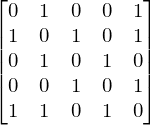

In [18]:
ar = np.array([
    [0,1,0,0,1],
    [1,0,1,0,1],
    [0,1,0,1,0],
    [0,0,1,0,1],
    [1,1,0,1,0],
])

from sympy import *
init_printing()
Matrix(ar)

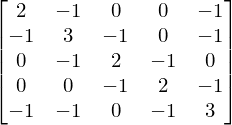

In [25]:
L = (ar.sum(1)*np.eye(5)).astype(np.int) - ar
Matrix(L)

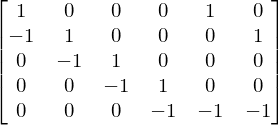

In [17]:
ar = np.array([
    [1,0,0,0,1,0],
    [-1,1,0,0,0,1],
    [0,-1,1,0,0,0],
    [0,0,-1,1,0,0],
    [0,0,0,-1,-1,-1],
])
Matrix(ar)

In [8]:
class statistics(object):
    def __init__(self,properties={}):
        size = None # this needs to be computed and choose a sensible tensor order
        self._page = np.array(size,np.float)
        #construct a tensor which is the size of the time axis * 8 moments * each observable that we are tracking
        self._num_obs = 1
        self._last_t = 0
        
    def init():
        #and do flush check
        return self

    def save(self, file=None):
        #fastest way to dump the page to disk in a way pandas will be able to get it back
        #could put it on another thread and get on with the next chunk but whatever
        pass
    
    @numba.jit
    def update(self, t, v):
        for o in range(self._num_obs):
            for m in range(9):   self._page[o][m][t] = v[o]**m

    @numba.jit
    def flush(self):
        for o in range(self._num_obs):
            for m in range(9):     
                #get the last value for this time for each observable
                val = self._page[o][m][self._last_t]
                ar = self._page[o][m]
                #then fill all nan values with this last computed value 
                ar[np.where(np.isnan(a))] = val            
        self.save()
                
    
#stats module time loop test
#create a numpy tensor wrapper with functions and make it avaialble to another object which is itself fast